# Language detection LSTM

In [9]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
import numpy as np

In [10]:
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cpu'

## import data

In [11]:
from Dataset import  Languages_Dataset, loadData, languages
from torch.utils.data import DataLoader
from sklearn.model_selection import train_test_split

X,y = loadData()

X_train, X_test, y_train, y_test = train_test_split(X,y, stratify=y, test_size=0.15)
dataset = Languages_Dataset(X_train, y_train)


## Net

In [12]:
from Net import Net
import os

vocab_size = 27**2-1 
embedding_dim = 64
hidden_size = 128
num_layers = 2
output_size = len(languages)

model = Net(vocab_size, embedding_dim, hidden_size, output_size, num_layers).to(device)
if os.path.exists(path:="model.pth"):
    print("Model loaded")
    model.load(path)
else:
    print("No file to load")

No file to load


## training

Epoche: [2/2]   Batch: [378/378]   Loss: 0.1208886579

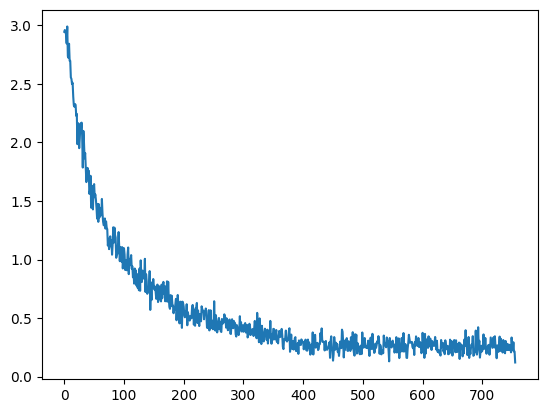

In [13]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

def train(epochs):
    model.train()
    dataloader = DataLoader(dataset, batch_size=256, shuffle=True, collate_fn=dataset.collate_fn)
    l = len(dataloader)
    loss_list = []
    for epoch in range(epochs):
        for i, (inputs, targets, lengths) in enumerate(dataloader):
            inputs:torch.Tensor; targets: torch.Tensor; lengths:torch.Tensor
            inputs, targets, lengths = inputs.to(device), targets.to(device), lengths.to(device)
            model.zero_grad()
            outputs = model(inputs, lengths)
            loss:torch.Tensor = criterion(outputs, targets)
            loss.backward()
            optimizer.step()
            loss_list.append(loss.item())
            print("\r"+f"Epoche: [{epoch+1}/{epochs}]   Batch: [{i+1}/{l}]   Loss: {loss.item():.10f}", flush=True, end="")
    return loss_list

plt.plot(train(2))

In [14]:
model.save("model.pth")

# testing

average success rate: 92.44 %


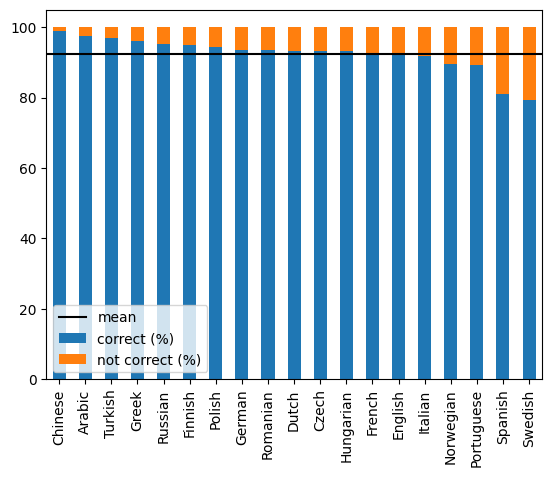

In [15]:
import pandas as pd

def test():
    model.eval()
    predictions = {}
    dataset = Languages_Dataset(X_test, y_test)
    
    for inp, target, length in dataset:
        lang = languages[target.argmax().item()]
        outp = model.predict(inp[:length])
        i = outp.argmax().item() 
        j = target.argmax().item()
        if i==j:
            predictions.setdefault(lang, {"correct": 0, "not correct": 0})["correct"] += 1
        else:
            predictions.setdefault(lang, {"correct": 0, "not correct": 0})["not correct"] += 1

    return predictions



df = pd.DataFrame(test()).T

df["correct (%)"] = df["correct"] / (df["correct"]+df["not correct"]) * 100
df["not correct (%)"] = 100-df["correct (%)"]
df[["correct (%)","not correct (%)"]].sort_values("correct (%)", ascending=False).plot.bar(stacked=True)
plt.axhline(df["correct (%)"].mean(), color="black", label="mean")
plt.legend()
print("average success rate:", round(df["correct (%)"].mean(),2), "%")

In [16]:
df

,correct,not correct,correct (%),not correct (%)
English,829,68,92.419175,7.580825
Italian,826,73,91.879867,8.120133
Greek,863,36,95.995551,4.004449
Hungarian,836,62,93.095768,6.904232
Portuguese,801,97,89.198218,10.801782
Swedish,709,186,79.217877,20.782123
Norwegian,803,95,89.420935,10.579065
Arabic,873,22,97.541899,2.458101
Dutch,840,60,93.333333,6.666667
Polish,846,51,94.314381,5.685619
